### Embeded encoding
### Edgar Acuna
### April 2021

In [28]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [29]:
#Considering a dataset with 10 instances two numerical predictors  and one categorical atribute with two levels
num_data = np.random.random(size=(10,2))
#One categorical variables with 3 levels
cat_data = np.array(["red","blue","green","red","red","blue","blue","green","red","red"])

In [30]:
num_data

array([[0.50665563, 0.16679339],
       [0.49440895, 0.50329996],
       [0.76354096, 0.6631422 ],
       [0.19727396, 0.87829434],
       [0.37640743, 0.54285661],
       [0.37735877, 0.9291872 ],
       [0.06075348, 0.17452767],
       [0.68869401, 0.62395586],
       [0.18022891, 0.49286402],
       [0.09951957, 0.98850516]])

In [31]:
#Replacing the values of the categorical features by numerical values using skelearn's LabelEncoder 
#The coding is in alphabetic order
from sklearn.preprocessing  import LabelEncoder 
lb_make = LabelEncoder()
cat_data= lb_make.fit_transform(cat_data)
cat_data

array([2, 0, 1, 2, 2, 0, 0, 1, 2, 2], dtype=int64)

In [32]:
#Original Dataset
all=np.insert(num_data,num_data.shape[1],cat_data,1)
all

array([[0.50665563, 0.16679339, 2.        ],
       [0.49440895, 0.50329996, 0.        ],
       [0.76354096, 0.6631422 , 1.        ],
       [0.19727396, 0.87829434, 2.        ],
       [0.37640743, 0.54285661, 2.        ],
       [0.37735877, 0.9291872 , 0.        ],
       [0.06075348, 0.17452767, 0.        ],
       [0.68869401, 0.62395586, 1.        ],
       [0.18022891, 0.49286402, 2.        ],
       [0.09951957, 0.98850516, 2.        ]])

In [33]:
#Let's create one-hot encoded matrix for the categorical feature
#Also it can be done with get_dummies from Pandas, Labelbinarizer and One-hot Enonder from scikit-learn
one_hot_encoded_cat_data = np.eye(cat_data.max()+1)[cat_data]

In [34]:
one_hot_encoded_cat_data 

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [35]:
#Let us consider a target attribute
target =[0,1,1,1,1,0,1,1,1,0]
target=np.array(target)

In [36]:
#This is the suggested  embedding size 
no_of_unique_cat  = len(np.unique(cat_data))
#embedding size = min(50, number of categories/2).
embedding_size = min(np.ceil((no_of_unique_cat)/2), 50 )
embedding_size = int(embedding_size)
embedding_size

2

In [37]:
# Use Input layers, specify input shape (dimensions except first)
inp_cat_data = keras.layers.Input(shape=(no_of_unique_cat,))
inp_num_data = keras.layers.Input(shape=(num_data.shape[1],))
# Bind nulti_hot to embedding layer
emb = keras.layers.Embedding(input_dim=no_of_unique_cat, output_dim=embedding_size)(inp_cat_data)  
# Also you need flatten embedded output-
# otherwise it's not possible to concatenate it with inp_num_data
flatten = keras.layers.Flatten()(emb)
# Concatenate two layers
conc = keras.layers.Concatenate()([flatten, inp_num_data])
dense1 = keras.layers.Dense(3, activation=tf.nn.relu, )(conc)
# Creating output layer
out = keras.layers.Dense(1, activation=None)(dense1)
model = keras.Model(inputs=[inp_cat_data, inp_num_data], outputs=out)

In [38]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 3)]          0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 3, 2)         6           input_5[0][0]                    
__________________________________________________________________________________________________
flatten_2 (Flatten)             (None, 6)            0           embedding_2[0][0]                
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 2)]          0                                            
____________________________________________________________________________________________

In [39]:
model.compile(optimizer=tf.compat.v1.train.AdamOptimizer(0.01),
              loss=keras.losses.mean_squared_error,
              metrics=[keras.metrics.mean_squared_error])

In [40]:
#Finding out the weights for each value of the categorical variable
model.fit([one_hot_encoded_cat_data, num_data], target)
model.layers[1].get_weights()[0]

1/1 [==============================] - 1s 989ms/step - loss: 0.6404 - mean_squared_error: 0.6404


array([[ 0.02476754, -0.04037877],
       [ 0.01742877, -0.00326428],
       [ 0.03906897,  0.03461203]], dtype=float32)

In [41]:
#Obtaining the transformed representation of the categorial feature
idx0=np.argwhere(cat_data==0)
idx1=np.argwhere(cat_data==1)
idx2=np.argwhere(cat_data==2)
newcode=np.zeros((10,2))
newcode[idx0,]=[-0.022, 0.047]
newcode[idx1,]=[-0.023, 0.038]
newcode[idx2,]=[-0.022,  -0.012]
newcode

array([[-0.022, -0.012],
       [-0.022,  0.047],
       [-0.023,  0.038],
       [-0.022, -0.012],
       [-0.022, -0.012],
       [-0.022,  0.047],
       [-0.022,  0.047],
       [-0.023,  0.038],
       [-0.022, -0.012],
       [-0.022, -0.012]])

In [42]:
#Trnasformed dataset
all1=np.insert(num_data,num_data.shape[1],np.transpose(newcode),1)
all1

array([[ 0.50665563,  0.16679339, -0.022     , -0.012     ],
       [ 0.49440895,  0.50329996, -0.022     ,  0.047     ],
       [ 0.76354096,  0.6631422 , -0.023     ,  0.038     ],
       [ 0.19727396,  0.87829434, -0.022     , -0.012     ],
       [ 0.37640743,  0.54285661, -0.022     , -0.012     ],
       [ 0.37735877,  0.9291872 , -0.022     ,  0.047     ],
       [ 0.06075348,  0.17452767, -0.022     ,  0.047     ],
       [ 0.68869401,  0.62395586, -0.023     ,  0.038     ],
       [ 0.18022891,  0.49286402, -0.022     , -0.012     ],
       [ 0.09951957,  0.98850516, -0.022     , -0.012     ]])

### Embedded encoding and Decisio Tree Classifier applied to the loan dataset

In [43]:
import pandas as pd
df = pd.read_csv("https://academic.uprm.edu/eacuna/datosarbol.csv")
y=df['Prestamo']
data=df.iloc[:,0:6]
#Codificando 0-1 las Variables Sexo y CasPropia
lb_make = LabelEncoder()
data["Sexo"] = lb_make.fit_transform(data["Sexo"])
data['CasPropia']=lb_make.fit_transform(data["CasPropia"])
data1=data['StatustMarital']
#Aplicando OneHot encoding a la predictora StatustMarital
data2=pd.get_dummies(data1,prefix=['StatustMarital'])
data3=pd.concat([data.iloc[:,0:5],data2],axis=1)
y2=lb_make.fit_transform(y)
num_data1=data.iloc[:,0:5]
num_data1

,Sexo,Familia,CasPropia,AnosEmpleo,Sueldo
0,0,3,0,17,2500
1,1,5,1,10,3000
2,1,4,0,15,2000
3,0,3,1,16,2800
4,0,6,1,11,4000
5,1,4,1,26,3200
6,1,2,1,14,1800
7,0,5,1,10,3750
8,0,6,0,18,2970
9,0,4,1,12,3350


In [44]:
cat_data1= lb_make.fit_transform(data1)
cat_data1

array([2, 0, 3, 2, 3, 2, 2, 0, 1, 1, 2, 2, 2, 1, 0, 2, 2, 3, 1, 3, 1, 2,
       1, 0, 0])

In [45]:
one_hot_encoded_cat_data1 = np.eye(cat_data1.max()+1)[cat_data1]

In [46]:
one_hot_encoded_cat_data1 

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]])

In [47]:
#This is the suggested  embedding size 
no_of_unique_cat1  = len(np.unique(cat_data1))
#embedding size = min(50, number of categories/2).
embedding_size1= min(np.ceil((no_of_unique_cat1)/2), 50 )
embedding_size1 = int(embedding_size1)
embedding_size1

2

In [48]:
# Use Input layers, specify input shape (dimensions except first)
inp_cat_data1 = keras.layers.Input(shape=(no_of_unique_cat1,))
inp_num_data1 = keras.layers.Input(shape=(num_data1.shape[1],))
# Bind nulti_hot to embedding layer
emb = keras.layers.Embedding(input_dim=no_of_unique_cat1, output_dim=embedding_size1)(inp_cat_data1)  
# Also you need flatten embedded output-
# otherwise it's not possible to concatenate it with inp_num_data
flatten = keras.layers.Flatten()(emb)
# Concatenate two layers
conc = keras.layers.Concatenate()([flatten, inp_num_data1])
dense1 = keras.layers.Dense(3, activation=tf.nn.relu, )(conc)
# Creating output layer
out = keras.layers.Dense(1, activation=None)(dense1)
model = keras.Model(inputs=[inp_cat_data1, inp_num_data1], outputs=out)
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 4)]          0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 4, 2)         8           input_7[0][0]                    
__________________________________________________________________________________________________
flatten_3 (Flatten)             (None, 8)            0           embedding_3[0][0]                
__________________________________________________________________________________________________
input_8 (InputLayer)            [(None, 5)]          0                                            
____________________________________________________________________________________________

In [49]:
model.compile(optimizer=tf.compat.v1.train.AdamOptimizer(0.01),
              loss=keras.losses.mean_squared_error,
              metrics=[keras.metrics.mean_squared_error])

In [50]:
#Finding out the weights for each value of the categorical variable
model.fit([one_hot_encoded_cat_data1, num_data1], y2)
model.layers[1].get_weights()[0]

1/1 [==============================] - 1s 1s/step - loss: 4414403.5000 - mean_squared_error: 4414403.5000


array([[ 0.01868919,  0.05698363],
       [ 0.0095146 , -0.02859114],
       [-0.00357276,  0.00784882],
       [ 0.00629258,  0.03885097]], dtype=float32)

In [51]:
#Obtaining the transformed representation of the categorial feature
idx0=np.argwhere(cat_data1==0)
idx1=np.argwhere(cat_data1==1)
idx2=np.argwhere(cat_data1==2)
idx3=np.argwhere(cat_data1==3)
newcode1=np.zeros((25,2))
newcode1[idx0,]=[0.0478, -0.0047]
newcode1[idx1,]=[-0.0084, 0.0283]
newcode1[idx2,]=[-0.0497,  -0.011]
newcode1[idx3,]=[-.0450,   0.0063]
newcode1

array([[-0.0497, -0.011 ],
       [ 0.0478, -0.0047],
       [-0.045 ,  0.0063],
       [-0.0497, -0.011 ],
       [-0.045 ,  0.0063],
       [-0.0497, -0.011 ],
       [-0.0497, -0.011 ],
       [ 0.0478, -0.0047],
       [-0.0084,  0.0283],
       [-0.0084,  0.0283],
       [-0.0497, -0.011 ],
       [-0.0497, -0.011 ],
       [-0.0497, -0.011 ],
       [-0.0084,  0.0283],
       [ 0.0478, -0.0047],
       [-0.0497, -0.011 ],
       [-0.0497, -0.011 ],
       [-0.045 ,  0.0063],
       [-0.0084,  0.0283],
       [-0.045 ,  0.0063],
       [-0.0084,  0.0283],
       [-0.0497, -0.011 ],
       [-0.0084,  0.0283],
       [ 0.0478, -0.0047],
       [ 0.0478, -0.0047]])

In [52]:
#Transformed dataset
df = pd.DataFrame(newcode1, columns = ['w1','w2'])
data3=pd.concat([num_data1,df],axis=1)
#num_data1.shape
#all1=np.insert(num_data1,num_data1.shape[1],np.transpose(newcode1),1)
data3

,Sexo,Familia,CasPropia,AnosEmpleo,Sueldo,w1,w2
0,0,3,0,17,2500,-0.0497,-0.0110
1,1,5,1,10,3000,0.0478,-0.0047
2,1,4,0,15,2000,-0.0450,0.0063
3,0,3,1,16,2800,-0.0497,-0.0110
4,0,6,1,11,4000,-0.0450,0.0063
5,1,4,1,26,3200,-0.0497,-0.0110
6,1,2,1,14,1800,-0.0497,-0.0110
7,0,5,1,10,3750,0.0478,-0.0047
8,0,6,0,18,2970,-0.0084,0.0283
9,0,4,1,12,3350,-0.0084,0.0283


In [53]:
from sklearn import tree
from sklearn import metrics
modeltree = tree.DecisionTreeClassifier(max_depth=2,criterion='entropy')
modeltree = modeltree.fit(data3,y2)

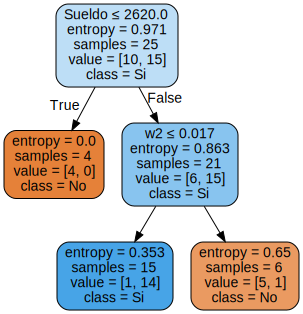

In [54]:
import graphviz
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
names=['Sexo',  'Familia',  'CasPropia',  'AnosEmpleo',  'Sueldo',  'w1','w2']
clases=['No','Si']
dot_data = tree.export_graphviz(modeltree, out_file=None, 
                         feature_names=names,  
                         class_names=clases,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [55]:
#Finding the accuracy by resubstitution
pred=modeltree.predict(data3)
acc=(y2==pred).mean()
print("The predictions are", pred,"\n","The accurracy is=",acc)

The predictions are [0 1 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 1 0 1 0 1 0 1 1] 
 The accurracy is= 0.92
